In [8]:
!pip install plotnine

  Using cached plotnine-0.9.0-py3-none-any.whl (1.2 MB)
  Using cached matplotlib-3.5.3-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached statsmodels-0.13.2-cp39-cp39-win_amd64.whl (9.1 MB)
  Using cached mizani-0.7.4-py3-none-any.whl (63 kB)
  Using cached palettable-3.3.0-py2.py3-none-any.whl (111 kB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [9]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LinearRegression  # Linear Regression Model
from sklearn.preprocessing import StandardScaler # z-score variable
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # model evaluation


In [33]:
df=pd.read_csv("amazon-books.txt", sep='\t')

In [34]:
df.head()

,Title,Author,List Price,Amazon Price,Hard/ Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight (oz)
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,0061564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,0307265722,8.0,5.2,1.4,22.4


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         325 non-null    object 
 1   Author        324 non-null    object 
 2   List Price    324 non-null    float64
 3   Amazon Price  325 non-null    float64
 4   Hard/ Paper   325 non-null    object 
 5   NumPages      323 non-null    float64
 6   Publisher     324 non-null    object 
 7   Pub year      324 non-null    float64
 8   ISBN-10       325 non-null    object 
 9   Height        321 non-null    float64
 10  Width         320 non-null    float64
 11  Thick         324 non-null    float64
 12  Weight (oz)   316 non-null    float64
dtypes: float64(8), object(5)
memory usage: 33.1+ KB


In [37]:
df.isnull().sum()

Title           0
Author          1
List Price      1
Amazon Price    0
Hard/ Paper     0
NumPages        2
Publisher       1
Pub year        1
ISBN-10         0
Height          4
Width           5
Thick           1
Weight (oz)     9
dtype: int64

In [38]:
df.shape

(325, 13)

In [40]:
df = df.dropna()

In [41]:
df.isnull().sum()

Title           0
Author          0
List Price      0
Amazon Price    0
Hard/ Paper     0
NumPages        0
Publisher       0
Pub year        0
ISBN-10         0
Height          0
Width           0
Thick           0
Weight (oz)     0
dtype: int64

## Explore

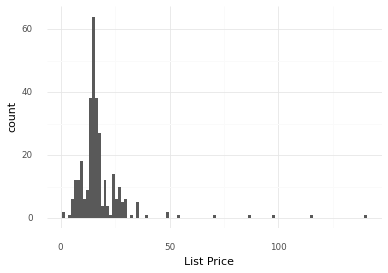

<ggplot: (147429571979)>

In [42]:
(ggplot( df, aes(x="List Price")) + geom_histogram() + theme_minimal())

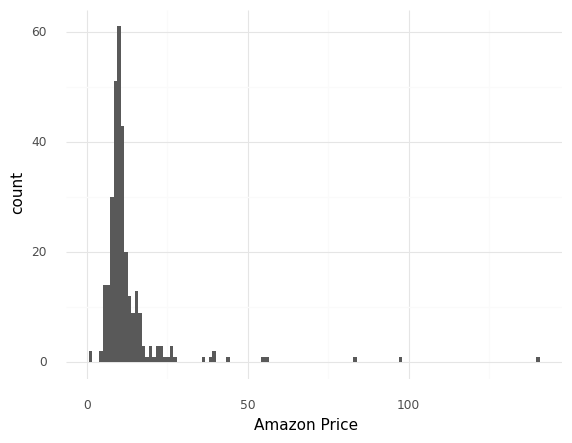

<ggplot: (147429563627)>

In [43]:
(ggplot( df, aes(x="Amazon Price")) + geom_histogram() + theme_minimal())

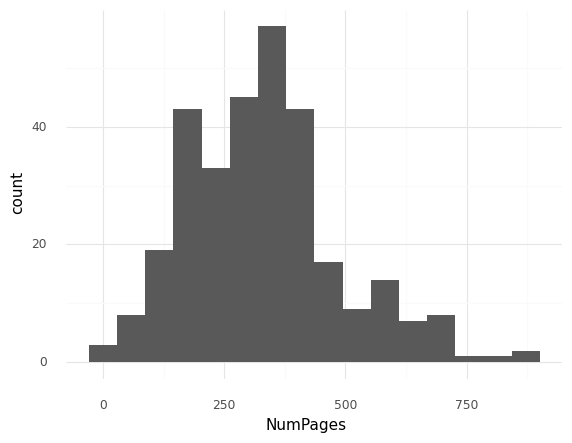

<ggplot: (147430989228)>

In [44]:
(ggplot( df, aes(x="NumPages")) + geom_histogram() + theme_minimal())

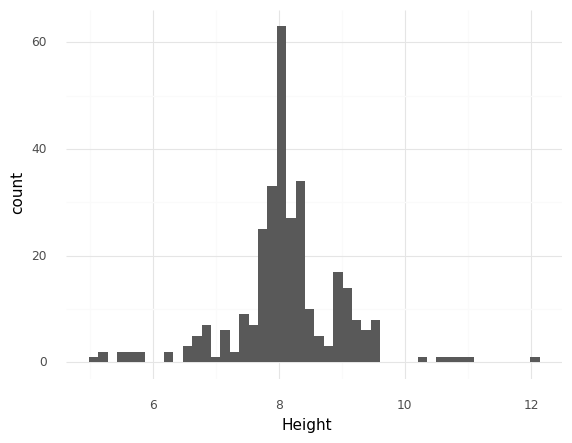

<ggplot: (147429553324)>

In [45]:
(ggplot( df, aes(x="Height")) + geom_histogram() + theme_minimal())

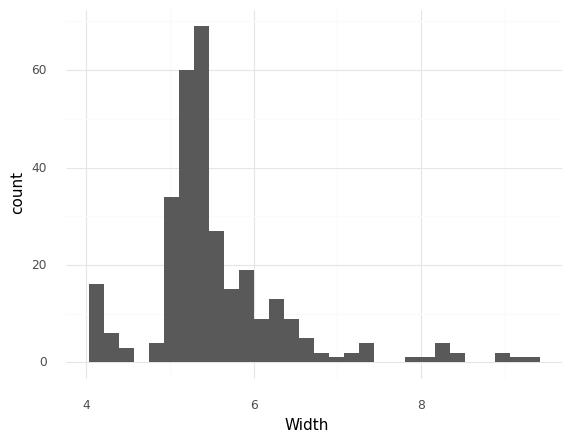

<ggplot: (147429622781)>

In [46]:
(ggplot( df, aes(x="Width")) + geom_histogram() + theme_minimal())

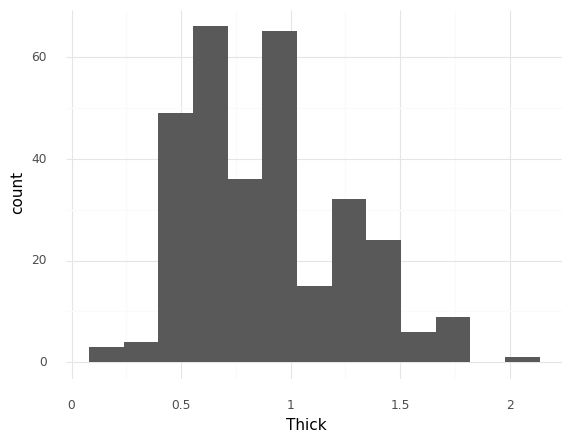

<ggplot: (147430159029)>

In [47]:
(ggplot( df, aes(x="Thick")) + geom_histogram() + theme_minimal())

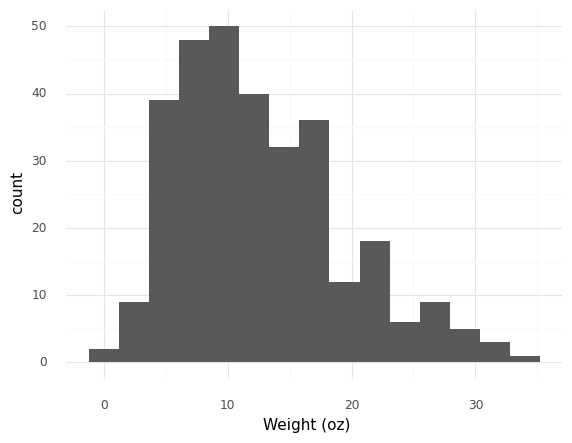

<ggplot: (147430280388)>

In [48]:
(ggplot( df, aes(x="Weight (oz)")) + geom_histogram() + theme_minimal())

## Model

In [49]:
df.columns

Index(['Title', 'Author', 'List Price', 'Amazon Price', 'Hard/ Paper',
       'NumPages', 'Publisher', 'Pub year', 'ISBN-10', 'Height', 'Width',
       'Thick', 'Weight (oz)'],
      dtype='object')

In [50]:
# set up x and y
predictors = ["List Price","NumPages","Weight (oz)","Thick","Height","Width"]

x= df[predictors]

y= df["Amazon Price"]

In [53]:
# z score
z= StandardScaler()  # create empty z score object

z.fit(x)

Xz = z.transform(x)

In [54]:
# create model

LR_Model = LinearRegression() # create empty LinearRegression object

In [55]:
# fit model
LR_Model.fit(Xz, y)

LinearRegression()

## Model Evaluation

In [57]:
#predict
price_pred = LR_Model.predict(Xz)
price_pred[1:10]

array([10.91587503,  0.64596322,  7.87491152, 21.75388566, 18.09350432,
       13.26001981, 10.59729274, 21.43797602,  9.48174291])

In [59]:
#mse and mae

print(mean_squared_error(y, price_pred))
print(mean_absolute_error(y, price_pred))

10.61233860175146
2.160439748755669


In [60]:
# r2 score

print(r2_score(y, price_pred))

0.9205886088486431


## Make Data Frame

In [61]:
# make residual plot
assump = pd.DataFrame({"error" : y - price_pred,
                      "predicted" : price_pred})

## Normality of Residuals

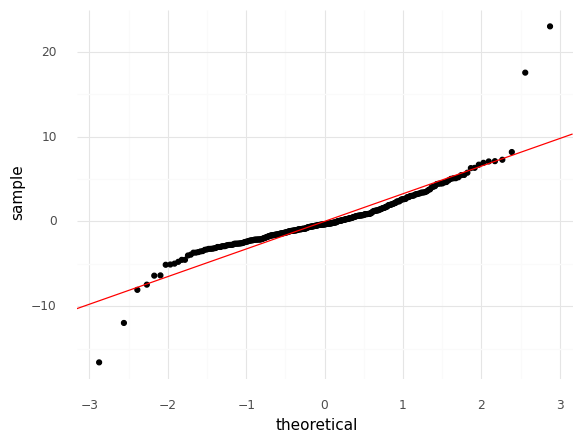

<ggplot: (147430338732)>

In [63]:
(ggplot(assump, aes(sample="error")) + stat_qq() + theme_minimal() + geom_abline(intercept=0, slope= np.std(assump["error"]), color="red"))

## Pull Coefficients

In [71]:
# coef df

coefficients = pd.DataFrame({"Coef": LR_Model.coef_,
                    "Name": predictors})

coefficients = coefficients.append({"Coef" : LR_Model.intercept_,
                                   "Name" : "intercept"}, ignore_index=re_index=True)

coefficients                                   

,Coef,Name
0,11.401887,List Price
1,0.231519,NumPages
2,-0.419686,Weight (oz)
3,-1.159632,Thick
4,-0.098886,Height
5,-0.197179,Width
6,12.587645,intercept


## Predict

In [67]:
newBook = np.array([12.45, 300, 10, .8, 8, 5]).reshape(1,-1)

newBookz = z.transform(newBook)

LR_Model.predict(newBookz)

array([8.42151431])

In [72]:
newBook_inter = np.append(newBookz, 1)
newBook_inter

array([-0.41343253, -0.19260029, -0.36718493, -0.25354952, -0.15097461,
       -0.65582302,  1.        ])

In [75]:
np.sum(np.array(coefficients["Coef"])*newBook_inter)

8.421514307944575

## Sklearn with Beyonce Data 

In [76]:
df= pd.read_csv("Beyonce_data.csv")

In [78]:
df.head()

,Unnamed: 0,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,track_name
0,1,Beyoncé,0.386,0.28800,1,-18.513,1,0.0602,0.533,0.01670,0.1410,0.399,43850,balance (mufasa interlude)
1,2,Beyoncé,0.484,0.36300,5,-8.094,0,0.0368,0.645,0.00000,0.1250,0.201,226479,BIGGER
2,3,Beyoncé,0.537,0.24700,2,-17.750,1,0.0793,0.199,0.00001,0.4230,0.170,46566,the stars (mufasa interlude)
3,4,Beyoncé,0.672,0.69600,4,-6.693,0,0.1770,0.200,0.02750,0.0736,0.642,162353,FIND YOUR WAY BACK
4,5,Beyoncé,0.000,0.00515,9,-22.612,0,0.0000,0.524,0.95000,0.1140,0.000,13853,uncle scar (scar interlude)


In [79]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'duration_ms', 'track_name'],
      dtype='object')

In [80]:
predictors = ["loudness","speechiness","acousticness","instrumentalness","liveness","valence"]

## Model

In [82]:
# set up x an y

x= df[predictors]
y= df["danceability"]

In [84]:
#  z score

zScore = StandardScaler()

zScore.fit(x)

Xz = zScore.transform(x)

In [86]:
# create and fit model

df_mod = LinearRegression()
df_mod.fit(Xz, y)

LinearRegression()

In [92]:
# predict, mse, mae

df_pred = df_mod.predict(Xz)
print(mean_squared_error(y, df_pred))
print(mean_absolute_error(y, df_pred))

0.012870400038096166
0.09139529046881288


In [93]:
# r2

r2_score(y, df_pred)

0.5888425804403327

## Does adding Energy improve the fit?

In [95]:
predictors = ["loudness","speechiness","acousticness","instrumentalness","liveness","valence", "energy"]

# seperate data

x= df[predictors]
y=df["danceability"]

# z score
z= StandardScaler()
z.fit(x)
Xz= z.transform(x)

# create and fit model

LR = LinearRegression()
LR.fit(Xz, y)

# predictions
df_pred2 = LR.predict(Xz)

# model performance
print("mse : ", mean_squared_error(y, df_pred2))
print("mae : ", mean_absolute_error(y, df_pred2))
print("R2 : ", r2_score(y, df_pred2))

mse :  0.012562902640532307
mae :  0.0895094807124462
R2 :  0.5986658832226424


## Predcitions

In [97]:
# coefs

coefficients = pd.DataFrame({"Coef": LR.coef_,
                            "Names" : predictors})

coefficients

,Coef,Names
0,0.021811,loudness
1,-0.000348,speechiness
2,-0.069230,acousticness
3,-0.007439,instrumentalness
4,-0.030047,liveness
5,0.091763,valence
6,-0.034683,energy


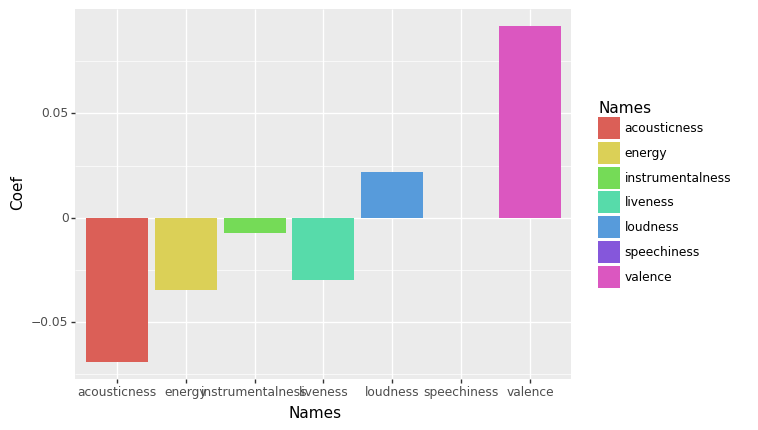

<ggplot: (147430933309)>

In [102]:
# coef plot

(ggplot(coefficients, aes(x= "Names", y="Coef", fill= "Names")) + geom_bar(stat="identity"))